In [1]:
import gym
from tensorflow import keras
from tensorflow.keras.optimizers.legacy import Adam
from rl.agents.dqn import DQNAgent
from rl.policy import EpsGreedyQPolicy
from rl.memory import SequentialMemory
import matplotlib.pyplot as plt
from keras.metrics import AUC

import numpy as np

from env.env import KeibaEnv

# ゲーム環境を作成します
env = KeibaEnv(
    "./../data/train/2003_binary_without_g.csv",
    "./../data/train/2003_result.csv"
)

# ゲーム環境を初期化します。
observation = env.reset()

# 環境からアクション数を取得します。このゲームでは4となります。
nb_actions = env.action_space.n

try:
    model = keras.models.load_model('./../model/binary_model_without_g')
except:
    print("create")
    # Kerasを使ってモデルを作成します。
    model = keras.models.Sequential([
        keras.layers.Flatten(input_shape=(1,) + env.observation_space.shape),
        keras.layers.Dense(128, activation="relu"),
        keras.layers.Dense(128, activation="relu"),
        keras.layers.Dense(128, activation="relu"),
        keras.layers.Dense(nb_actions, activation="linear"),
    ])

# 経験値を蓄積するためのメモリです。学習を安定させるために使用します。
memory = SequentialMemory(limit=50000, window_length=1)

# 行動ポリシーはBoltzmannQPolicyを使用しています。
# EpsGreedyQPolicyと比較して、こちらの方が収束が早かったので採用しています。
policy = EpsGreedyQPolicy()

# DQNAgentを作成します。
dqn = DQNAgent(
    model=model,
    nb_actions=nb_actions,
    memory=memory,
    target_model_update=1e-2,
    policy=policy)

# DQNAgentのコンパイル。最適化はAdam,評価関数はMAEを使用します。
dqn.compile(Adam(learning_rate=1e-06), metrics=[AUC(name='auc')])

# 学習開始
history = dqn.fit(env, nb_steps=500000, visualize=False, verbose=1)



RANK_ONE_HORSE: 0
RANK_TWO_HORSE: 0
RANK_THREE_HORSE: 0
NO_ACITON: 0
TOTAL_REWARD: 0

create
Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089
Training for 500000 steps ...

RANK_ONE_HORSE: 0
RANK_TWO_HORSE: 0
RANK_THREE_HORSE: 0
NO_ACITON: 0
TOTAL_REWARD: 0

Interval 1 (0 steps performed)
   83/10000 [..............................] - ETA: 18s - reward: 0.0602

C:\Users\kazuy\anaconda3\envs\keiba_ai_learning2\lib\site-packages\keras\engine\training_v1.py:2357: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


  978/10000 [=>............................] - ETA: 16s - reward: 0.0879

C:\Users\kazuy\anaconda3\envs\keiba_ai_learning2\lib\site-packages\keras\engine\training_v1.py:2357: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


 3320/10000 [========>.....................] - ETA: 25s - reward: 0.1500
RANK_ONE_HORSE: 85
RANK_TWO_HORSE: 96
RANK_THREE_HORSE: 87
NO_ACITON: 3055
TOTAL_REWARD: 76600

 6639/10000 [==================>...........] - ETA: 14s - reward: 0.1363
RANK_ONE_HORSE: 77
RANK_TWO_HORSE: 86
RANK_THREE_HORSE: 126
NO_ACITON: 3034
TOTAL_REWARD: -54000

 9959/10000 [============================>.] - ETA: 0s - reward: 0.1347
RANK_ONE_HORSE: 81
RANK_TWO_HORSE: 103
RANK_THREE_HORSE: 168
NO_ACITON: 2971
TOTAL_REWARD: -25800

10000/10000 [==============================] - 44s 4ms/step - reward: 0.1338
3 episodes - episode_reward: 446.333 [405.000, 497.000] - loss: 3.934 - auc: 0.901 - mean_q: 0.698

Interval 2 (10000 steps performed)
 3287/10000 [========>.....................] - ETA: 30s - reward: 0.0946
RANK_ONE_HORSE: 79
RANK_TWO_HORSE: 236
RANK_THREE_HORSE: 84
NO_ACITON: 2924
TOTAL_REWARD: -163400

 6606/10000 [==================>...........] - ETA: 15s - reward: 0.0966
RANK_ONE_HORSE: 117
RANK_TWO_HOR

INFO:tensorflow:Assets written to: ./../model/binary_model_without_g\assets


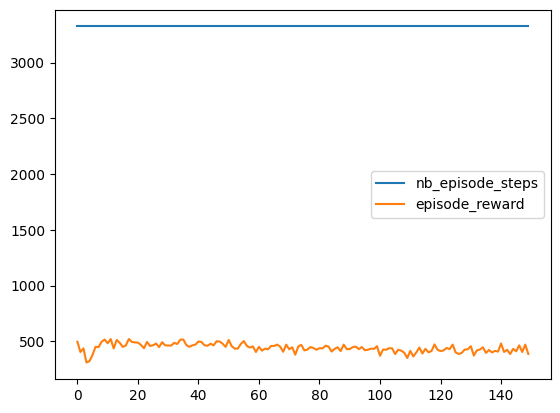

In [2]:
# 学習した重みをファイルに保存します。
#dqn.save_weights('moving_test.hdf5', overwrite=True)

# 学習したモデルを保存
model.save("./../model/binary_model_without_g")

# ゲームごとのステップ数と報酬をグラフ化します。
plt.plot(history.history['nb_episode_steps'], label='nb_episode_steps')
plt.plot(history.history['episode_reward'], label='episode_reward')
plt.legend()
plt.show()